# Machine Learning: House Price Prediction

A housing data set to build a regression model that predicts house price from various features that describe a house. We will:

* Build a linear regression model
* Usea scikit-learn's `Pipeline` with `StandardScaler` and `LinearRegression` steps
* Generate polynomial features
* Use `Ridge` predictor

In [14]:
import seaborn as sns
sns.set()

In [18]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


## Loading the data set

We will be using a housing data set and we will try to predict house price.

The following cell downloads the data we will be working with.

In [21]:
! python -m wget https://github.com/ktnegron/Python-Machine-Learning/blob/9fd52116ba99d3c4125385b5835a8891f45b5416/king_county_housing_data.csv

-1 / unknown
Saved under king_county_housing_data (1).csv


The cell below loads the data into a pandas DataFrame. Look at the first couple of rows of the DataFrame.

In [39]:
import pandas as pd
housing_df = pd.read_csv("./king_county_housing_data.csv", index_col=0)
housing_df.shape

(17269, 19)

In [36]:
housing_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503


Let's also download the data dictionary that describes what each column in the data means. 

In [22]:
! python -m wget https://github.com/ktnegron/Python-Machine-Learning/blob/main/king_county_housing_dict.pickle

-1 / unknown
Saved under king_county_housing_dict (1).pickle


The data dictionary file is a pickle file. Complete the code in the following cell so that you load the dictionary from file. 

In [31]:
import pickle

with open('./king_county_housing_dict.pickle', 'rb') as f:
    housing_dict = pickle.load(f)

Next we will create the feature matrix `X` with chosen numerical variables.

We will also separate house price into a target column vector `y`.

Remember that scikit-learn expects `X` to be a 2-dimensional `ndarray` or a DataFrame and `y` to be a 1-dimensional `ndarray` or a DataSeries.

In [32]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','lat','long','sqft_living15','sqft_lot15']
X = housing_df[features]
y = housing_df['price']

In [33]:
y

id
7129300520     221900.0
6414100192     538000.0
5631500400     180000.0
2487200875     604000.0
1954400510     510000.0
                ...    
7852140040     507250.0
9834201367     429000.0
7936000429    1007500.0
263000018      360000.0
6600060120     400000.0
Name: price, Length: 17269, dtype: float64

Run the two cells below to check that your `X` and `y` have the correct shape.

In [42]:
# X matrix should be the following size. Check
X.shape == (17269, 16)

True

In [43]:
# y should be 1-dimensional. Check
y.shape == (17269,)

True

## Exploratory data visualization

Plot the house price as a function of a feature that we can pick from a dropdown menu. Run the cell below and play with the widget to become familiar with the data.

In [44]:
import matplotlib.pyplot as plt
from ipywidgets import widgets

def scatter_plot(column):
    plt.plot(X[column], y, 'k.')
    plt.xlabel(housing_dict[column])
    plt.ylabel('Home price')
    plt.title('Home Price vs {}'.format(housing_dict[column]))

widgets.interact(scatter_plot, column=X.columns);

interactive(children=(Dropdown(description='column', options=('bedrooms', 'bathrooms', 'sqft_living', 'sqft_lo…

### Square footage model

We will prepare and train a linear model that predicts home value based only on the living area square footage (column `'sqft_living'`). First create a feature matrix `X_sq_ft` with only that column. 

In [61]:
X_sq_ft = housing_df[['sqft_living']]

In [62]:
X_sq_ft.shape == (17269, 1)

True

Create a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) model and fit it.

In [63]:
from sklearn.linear_model import SGDRegressor
import numpy as np
from sklearn.linear_model import LinearRegression

In [64]:
sq_footage_model = LinearRegression()
sq_footage_model.fit(X_sq_ft, y);
y_predicted = sq_footage_model.predict(X_sq_ft)

The next cell will plot the actual data as a scatter plot and the trained model as a red line.

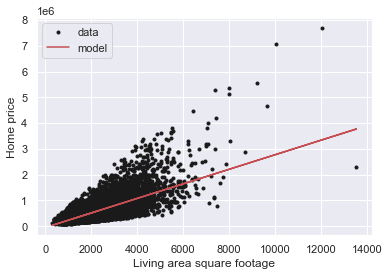

In [65]:
plt.plot(X_sq_ft, y, 'k.', label='data')
plt.plot(X_sq_ft, y_predicted, 'r-', label='model')
plt.xlabel('Living area square footage')
plt.ylabel('Home price')
plt.legend();

Let's also compute the training mean square error and the $R^2$ score of the model you just built.

In [66]:
from sklearn import metrics

In [67]:
# Compute the mean square error for this model
sq_footage_mse = metrics.mean_squared_error(y, y_predicted)

print('Training mean squared error for square footage model: ', sq_footage_mse)

Training mean squared error for square footage model:  68497393870.33039


In [68]:
# Compute R^2 for this model
sq_footage_r2 = metrics.r2_score(y, y_predicted)

print('Training R^2 for square footage model:', sq_footage_r2)

Training R^2 for square footage model: 0.49402110730976634


## Scaled model with pipeline

We will build a linear regression model based on the living area square footage (column `'sqft_living'`) and the number of bedrooms (column `'bedrooms'`). Create a DataFrame with only these two columns. 

In [59]:
X_sq_ft_bedrooms = housing_df[['sqft_living','bedrooms']]
X_sq_ft_bedrooms.head()

,sqft_living,bedrooms
id,,
7129300520,1180,3
6414100192,2570,3
5631500400,770,2
2487200875,1960,4
1954400510,1680,3


Run the cell below to check that the shape of your feature matrix is correct.

Recall that in the case of a linear regression model, we can use the model coefficients to determine which features make most impact on prediction. However if we want to use coefficients to determine feature importance and the features have very different scales, we need to first rescale them before we feed the data into a linear regression. 

So let's rescale the two features we are working with. Use the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler), fit it to the data and use it to transform `X_sq_ft_bedrooms` into a transformed feature matrix `X_scaled`.

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sq_ft_bedrooms)

Now that we scaled the two features, plot one against the other. You should see that the mean of the new features is 0 and that their scales are similar. That is what we wanted!

Text(0, 0.5, 'Home price ($)')

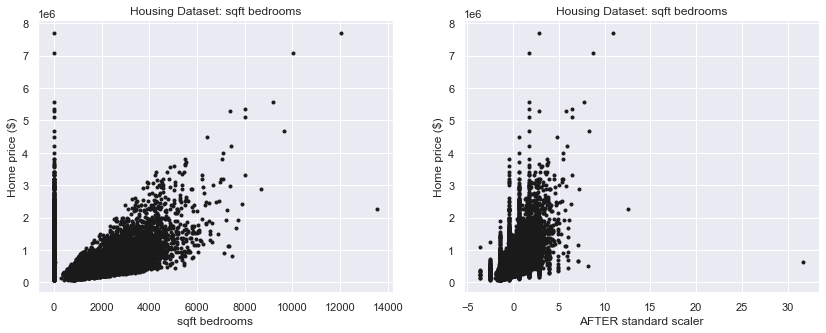

In [75]:
fig = plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(X_sq_ft_bedrooms, y, '.',color='k')
plt.title('Housing Dataset: sqft bedrooms')
plt.xlabel('sqft bedrooms')
plt.ylabel('Home price ($)')

plt.subplot(1, 2, 2)
plt.plot(X_scaled, y, '.',color='k')
plt.title('Housing Dataset: sqft bedrooms')
plt.xlabel('AFTER standard scaler')
plt.ylabel('Home price ($)')

Next we want to train a linear regression model on the scaled data. While we could feed feature matrix `X_scaled` into a `LinearRegression`,  applying a transformer directly and feeding transformed data into the model by hand is not best practice. 

Instead, we should build a scikit-learn [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) to organize our transformers and estimator into a single object which only needs to be applied to the data once. In this case, the pipeline you need to build will combine a `StandardScaler` (to scale both columns of the feature matrix) with a `LinearRegression`.

In [76]:
from sklearn.pipeline import Pipeline

In [77]:
pipeline_predictor = Pipeline([("feature scaling", StandardScaler()),
                 ("linear regression", LinearRegression())])
pipeline_predictor.fit(X_sq_ft_bedrooms,y)

Pipeline(steps=[('feature scaling', StandardScaler()),
                ('linear regression', LinearRegression())])

In [78]:
y_predicted2 = pipeline_predictor.predict(X_sq_ft_bedrooms)

In [79]:
# Calculate R^2 for this model
scaled_model_r2 = metrics.r2_score(y, y_predicted2)

print('Training R^2 for scaled model:', scaled_model_r2)

Training R^2 for scaled model: 0.5074181222218166


## Model coefficients

Inspect the model you built for the previous question and obtain the model coefficients corresponding to each of the two features.

In [80]:
# Obtain same coefficients with LinearRegression:
X_scaled = StandardScaler().fit_transform(X_sq_ft_bedrooms)
lr = LinearRegression().fit(X_scaled, y);
coefs = lr.coef_
coefs

array([288511.48982945, -52036.4790466 ])

In [82]:
features_coeffs = list(zip(X_sq_ft_bedrooms.columns, coefs))
features_coeffs

[('sqft_living', 288511.489829452), ('bedrooms', -52036.47904660332)]

## Full model

Create a linear model using all numerical features of the data set. Make a DataFrame that contains all the features we want to use (that is all numerical features, so make sure you drop the two that are categorical as well as the target column). Again, the **order of the columns matters** for the grader so make sure that the order of columns you will use is the same as in the original DataFrame.

In [83]:
X_full_model = X

In [85]:
X_full_model.shape == (17269, 16)

True

In [89]:
full_model = LinearRegression()
full_model.fit(X,y)

LinearRegression()

In [90]:
y_predicted3 = full_model.predict(X)

In [47]:
# Calculate R^2 for this model
full_model_r2 = metrics.r2_score(y,y_predicted3)

print('Training R^2 for full model:', full_model_r2)

Training R^2 for full model: 0.6952633946485791


If you want to display the equation that the linear model uses to make predictions, run the cell below.

In [91]:
# Printing the formula the model uses to make predictions
print('y_predicted_full_model = \n' +
      '\n  + '.join(['{} * {}'.format(val, col) for val, col in list(zip(full_model.coef_, X_full_model.columns))])
      +'\n  + {}'.format(full_model.intercept_))

y_predicted_full_model = 
-33264.401394463806 * bedrooms
  + 44801.55150287015 * bathrooms
  + 111.36039454653209 * sqft_living
  + 0.10954111021851029 * sqft_lot
  + 1663.2396240763678 * floors
  + 566775.5420651278 * waterfront
  + 48536.97625834439 * view
  + 26398.105612236082 * condition
  + 98783.04209072102 * grade
  + 69.19537875559973 * sqft_above
  + 42.165015869773924 * sqft_basement
  + -2652.2568040143415 * yr_built
  + 556423.9509920564 * lat
  + -108803.66663236335 * long
  + 23.877985705355695 * sqft_living15
  + -0.4044373491416823 * sqft_lot15
  + -35252644.029572554


## Polynomial model

So far we have only modeled linear behavior in our data. However, some features of the data set seem to have non-linear behavior (see `grade`, for example). In this section, we will do some basic feature engineering by creating new features that encode the interactions we're interested in.  For example, we can use the values given by the product of each pair of features which is exactly what scikit-learn's [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) does. We will use this transformer to generate the second degree versions of each of the features.

For example, if we consider only `bedrooms`, `bathrooms`, and `waterfront`, the second degree features (i.e. columns) would be:

```
1, bedrooms, bathrooms, waterfront, bedrooms^2, bathrooms^2, waterfront^2, bedrooms*bathrooms, bedrooms*waterfront, bathrooms*waterfront
```

As we will be adding many new features to the DataFrame, we will compensate by using a [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) model, which adds an extra cost term that penalizes the use of non-predictive features.

Let's reuse the `X_full_model` DataFrame:

In [92]:
X_full_model.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503


Import the `PolynomialFeatures` class and make an instance of the transformer which generates the **second degree** versions of each of the features. Use it to obtain a transformed feature matrix.

In [93]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline

In [97]:
polynomial_transformer = Pipeline([('standard_scaler', MinMaxScaler((-1,1))),
                                   ('polynomial_trans', PolynomialFeatures(2))
                                   ])

polynomial_transformer.fit(X_full_model,y)

Pipeline(steps=[('standard_scaler', MinMaxScaler(feature_range=(-1, 1))),
                ('polynomial_trans', PolynomialFeatures())])

In [66]:
X_transformed = polynomial_transformer.fit_transform(X_full_model,y)

In [67]:
X_transformed.shape

(17269, 153)

We have 153 columns:
- `1` for the constant column,
- `16` for the original (unaltered) features,
- `16 * 15/2` for the pairwise combinations of the form `column_a * column_b`,
- `16` for the squared features of the form `column_a * column_a`.

In [98]:
from sklearn.linear_model import Ridge
# Create the pipeline
poly_pipeline = Pipeline([('standard_scaler', MinMaxScaler((-1,1))),
                                   ('polynomial_trans', PolynomialFeatures(2)),
                                   ('regressor', Ridge())])

poly_pipeline.fit(X_full_model,y)

Pipeline(steps=[('standard_scaler', MinMaxScaler(feature_range=(-1, 1))),
                ('polynomial_trans', PolynomialFeatures()),
                ('regressor', Ridge())])

Train the model and submit the `predict` method of the model to the grader.

In [99]:
poly_pipeline.predict

<function sklearn.pipeline.Pipeline.predict(self, X, **predict_params)>